In [225]:
# Import necessary Library
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns

In [226]:
import random
import numpy as np
random.seed(42)
X = np.random.uniform(0,1,20)
print(X)

np.all(X >= 0)

np.all(X < 1)

[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152 0.79172504 0.52889492
 0.56804456 0.92559664 0.07103606 0.0871293  0.0202184  0.83261985
 0.77815675 0.87001215]


True

In [227]:
random.seed(42)
mu, sigma = 0, 1 # mean and standard deviation
N = np.random.normal(mu, sigma, 20)
print(N)

[ 1.49407907 -0.20515826  0.3130677  -0.85409574 -2.55298982  0.6536186
  0.8644362  -0.74216502  2.26975462 -1.45436567  0.04575852 -0.18718385
  1.53277921  1.46935877  0.15494743  0.37816252 -0.88778575 -1.98079647
 -0.34791215  0.15634897]


[-1.52510463e-01 -9.96691450e-01 -5.70435983e-01 -3.63695766e-01
  2.06206129e-01 -7.28223903e-01  4.68620742e-01 -7.03017528e-01
  6.40244190e-04  5.23188732e-01 -9.61254986e-01 -1.99274801e-01
 -2.61352460e-01 -3.03711245e-01  4.47155165e-01  5.58327450e-01
  3.79159515e-02 -1.06633783e+00 -1.01918269e+00 -7.13281477e-01]
[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152 0.79172504 0.52889492
 0.56804456 0.92559664 0.07103606 0.0871293  0.0202184  0.83261985
 0.77815675 0.87001215]


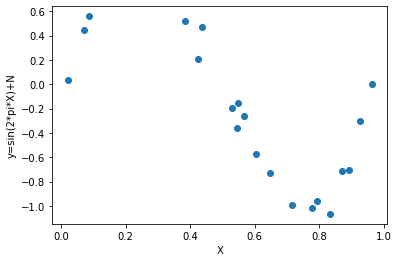

           x         y
0   0.548814 -0.152510
1   0.715189 -0.996691
2   0.602763 -0.570436
3   0.544883 -0.363696
4   0.423655  0.206206
5   0.645894 -0.728224
6   0.437587  0.468621
7   0.891773 -0.703018
8   0.963663  0.000640
9   0.383442  0.523189
10  0.791725 -0.961255
11  0.528895 -0.199275
12  0.568045 -0.261352
13  0.925597 -0.303711
14  0.071036  0.447155
15  0.087129  0.558327
16  0.020218  0.037916
17  0.832620 -1.066338
18  0.778157 -1.019183
19  0.870012 -0.713281


In [228]:
import matplotlib.pyplot as plt
y=np.sin(2*np.pi*X)+N*(1/10)
print(y)
print(X)
plt.scatter(X,y)
plt.xlabel('X')
plt.ylabel('y=sin(2*pi*X)+N')
plt.show()

# Showing X and y values in data frame
import numpy as np
import pandas as pd
df = pd.DataFrame({'x':X, 'y':y})
print(df)


In [229]:

df.train=df[0:10]
print(df.train)


          x         y
0  0.548814 -0.152510
1  0.715189 -0.996691
2  0.602763 -0.570436
3  0.544883 -0.363696
4  0.423655  0.206206
5  0.645894 -0.728224
6  0.437587  0.468621
7  0.891773 -0.703018
8  0.963663  0.000640
9  0.383442  0.523189


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [230]:
X_train = df.train.iloc[:,0].values 
print(X_train)

[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152]


In [231]:
y_train = df.train.iloc[:,1].values 
print(y_train)

[-1.52510463e-01 -9.96691450e-01 -5.70435983e-01 -3.63695766e-01
  2.06206129e-01 -7.28223903e-01  4.68620742e-01 -7.03017528e-01
  6.40244190e-04  5.23188732e-01]


In [232]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
# transforming the data to include another axis
x = X_train[:, np.newaxis]
y = y_train[:, np.newaxis]
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

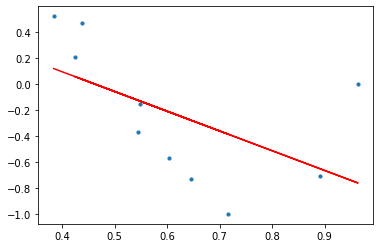

In [233]:
plt.scatter(x, y, s=10)
plt.plot(x, y_pred, color='r')
plt.show()


In [234]:
import operator
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

RMSE: 0.4998373571860261
R2: 0.0
weights:
[[0.]]


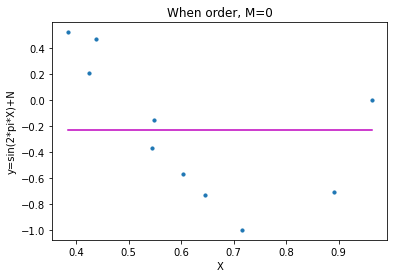

In [235]:
np.random.seed(0)
polynomial_features= PolynomialFeatures(degree=0)
x_poly = polynomial_features.fit_transform(x)

model0 = LinearRegression()
model0.fit(x_poly, y)
y_poly_pred = model0.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("RMSE:",rmse)
print("R2:",r2)
print('weights:')
print(model0.coef_)
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.title('When order, M=0')
plt.xlabel('X')
plt.ylabel('y=sin(2*pi*X)+N')
plt.show()

In [236]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

RMSE: 0.4279541041671442
R2: 0.26694431151125164
[[0.         1.39991535]]


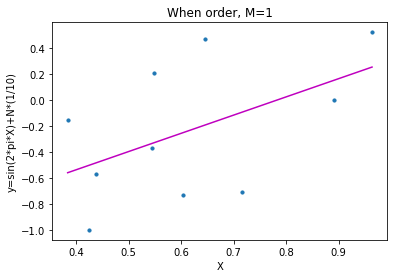

In [237]:
np.random.seed(0)
polynomial_features= PolynomialFeatures(degree=1)
x_poly = polynomial_features.fit_transform(x)

model1 = LinearRegression()
model1.fit(x_poly, y)
y_poly_pred = model1.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("RMSE:",rmse)
print("R2:",r2)
print(model1.coef_)
plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.title('When order, M=1')
plt.xlabel('X')
plt.ylabel('y=sin(2*pi*X)+N*(1/10)')
plt.show()

RMSE: 0.41291265715757974
R2: 0.31756865222584985
[[  0.          30.07960566 -47.71540672  24.94136368]]


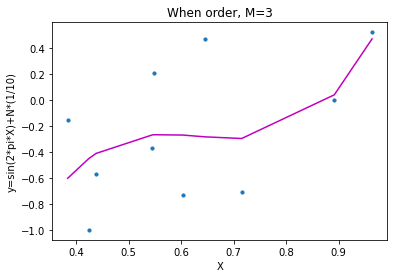

In [238]:
np.random.seed(0)
polynomial_features= PolynomialFeatures(degree=3)
x_poly = polynomial_features.fit_transform(x)

model3 = LinearRegression()
model3.fit(x_poly, y)
y_poly_pred = model3.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("RMSE:",rmse)
print("R2:",r2)
print(model3.coef_)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.title('When order, M=3')
plt.xlabel('X')
plt.ylabel('y=sin(2*pi*X)+N*(1/10)')
plt.show()

RMSE: 1.8749981246945704e-06
R2: 0.9999999999859284
[[ 0.00000000e+00 -8.64022092e+07  6.02141491e+08 -2.42066765e+09
   6.18524918e+09 -1.04157260e+10  1.15575979e+10 -8.14773538e+09
   3.31089625e+09 -5.90812207e+08]]


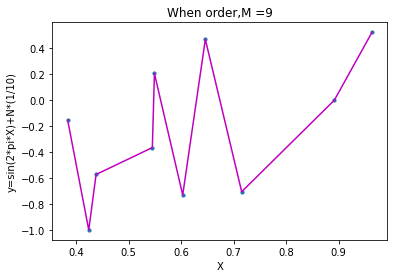

In [239]:
np.random.seed(0)
polynomial_features= PolynomialFeatures(degree=9)
x_poly = polynomial_features.fit_transform(x)

model9 = LinearRegression()
model9.fit(x_poly, y)
y_poly_pred = model9.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print("RMSE:",rmse)
print("R2:",r2)
print(model9.coef_)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.title('When order,M =9')
plt.xlabel('X')
plt.ylabel('y=sin(2*pi*X)+N*(1/10)')
plt.show()

In [240]:
print(model0.coef_)
print(model1.coef_)
print(model3.coef_)
print(model9.coef_)

[[0.]]
[[0.         1.39991535]]
[[  0.          30.07960566 -47.71540672  24.94136368]]
[[ 0.00000000e+00 -8.64022092e+07  6.02141491e+08 -2.42066765e+09
   6.18524918e+09 -1.04157260e+10  1.15575979e+10 -8.14773538e+09
   3.31089625e+09 -5.90812207e+08]]


In [241]:
import pandas as pd 

# intialise data of lists. 
data = {'M=0':[model0.coef_[0][0],"","","","","","","","","" ],'M=1':[model1.coef_[0][0],model1.coef_[0][1],"","","","","","","",""],'M=3':[model3.coef_[0][0],model3.coef_[0][1],model3.coef_[0][2],model3.coef_[0][3],"","","","","",""],'M=9':[ model9.coef_[0][0],model9.coef_[0][1],model9.coef_[0][2],model9.coef_[0][3],model9.coef_[0][4],model9.coef_[0][5],model9.coef_[0][6],model9.coef_[0][7],model9.coef_[0][8],model9.coef_[0][9]]}
    
print(data)
# Creates pandas DataFrame. 
df.w = pd.DataFrame(data, index =['w0', 'w1', 'w2', 'w3', 'w4', 'w5', 'w6', 'w7', 'w8', 'w9']) 
  
# print the data 
df.w 

{'M=0': [0.0, '', '', '', '', '', '', '', '', ''], 'M=1': [0.0, 1.399915352534754, '', '', '', '', '', '', '', ''], 'M=3': [0.0, 30.079605663834087, -47.715406721642566, 24.941363679588378, '', '', '', '', '', ''], 'M=9': [0.0, -86402209.17152746, 602141491.2251334, -2420667651.2227182, 6185249184.07055, -10415726027.735865, 11557597934.926004, -8147735380.191354, 3310896253.4596543, -590812207.0529249]}


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,M=0,M=1,M=3,M=9
w0,0,0,0,0.000000e+00
w1,,1.39992,30.0796,-8.640221e+07
w2,,,-47.7154,6.021415e+08
w3,,,24.9414,-2.420668e+09
w4,,,,6.185249e+09
w5,,,,-1.041573e+10
w6,,,,1.155760e+10
w7,,,,-8.147735e+09
w8,,,,3.310896e+09
w9,,,,-5.908122e+08


In [242]:
arr1=[]
for m in range(0,10):
    import operator
    import numpy as np
    import matplotlib.pyplot as plt

    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error, r2_score
    from sklearn.preprocessing import PolynomialFeatures
    np.random.seed(0)
    polynomial_features= PolynomialFeatures(degree=(m))
    x_poly = polynomial_features.fit_transform(x)

    model0 = LinearRegression()
    model0.fit(x_poly, y)
    y_poly_pred = model0.predict(x_poly)

    rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
    r2 = r2_score(y,y_poly_pred)
    print("RMSE:",rmse)
    arr1.append(rmse)

RMSE: 0.4998373571860261
RMSE: 0.4279541041671442
RMSE: 0.42414132816829236
RMSE: 0.41291265715757974
RMSE: 0.3903216903221164
RMSE: 0.34143058238951046
RMSE: 0.3407206522527545
RMSE: 0.19496357325408797
RMSE: 0.15198321566521197
RMSE: 1.8749981246945704e-06


In [243]:
df.test=df[10:19]
print(df.test)

           x         y
10  0.791725 -0.961255
11  0.528895 -0.199275
12  0.568045 -0.261352
13  0.925597 -0.303711
14  0.071036  0.447155
15  0.087129  0.558327
16  0.020218  0.037916
17  0.832620 -1.066338
18  0.778157 -1.019183


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


In [244]:
Xt= df.test.iloc[:,1].values 
print(Xt)

[-0.96125499 -0.1992748  -0.26135246 -0.30371125  0.44715516  0.55832745
  0.03791595 -1.06633783 -1.01918269]


In [245]:
yt = df.test.iloc[:,1].values 
print(yt)

[-0.96125499 -0.1992748  -0.26135246 -0.30371125  0.44715516  0.55832745
  0.03791595 -1.06633783 -1.01918269]


In [246]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
# transforming the data to include another axis
x = Xt[:, np.newaxis]
y = yt[:, np.newaxis]

In [247]:
arr = []
for m in range(0,10):
    import operator
    import numpy as np
    import matplotlib.pyplot as plt

    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error, r2_score
    from sklearn.preprocessing import PolynomialFeatures
    np.random.seed(0)
    polynomial_features= PolynomialFeatures(degree=(m))
    x_poly = polynomial_features.fit_transform(x)

    model0 = LinearRegression()
    model0.fit(x_poly, y)
    y_poly_pred = model0.predict(x_poly)

    rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
    r2 = r2_score(y,y_poly_pred)
    print("RMSE:",rmse)
    arr.append(rmse)

RMSE: 0.5736872062697822
RMSE: 2.8744111503786724e-16
RMSE: 1.581127466057893e-16
RMSE: 6.923456968425373e-17
RMSE: 2.1382404193843313e-15
RMSE: 3.3090756556660426e-16
RMSE: 3.4147380356602024e-16
RMSE: 1.0003592099386143e-15
RMSE: 4.794982656089889e-16
RMSE: 1.3132934982969282e-15


In [248]:
import pandas as pd 

# intialise data of lists. 
data1 = {'M':[0,1,2,3,4,5,6,7,8,9],'Train.RMSE':arr1,'Test.RMSE':arr} 
print(data)
# Creates pandas DataFrame. 
df1 = pd.DataFrame(data1) 
  
# print the data 
df1 

{'M=0': [0.0, '', '', '', '', '', '', '', '', ''], 'M=1': [0.0, 1.399915352534754, '', '', '', '', '', '', '', ''], 'M=3': [0.0, 30.079605663834087, -47.715406721642566, 24.941363679588378, '', '', '', '', '', ''], 'M=9': [0.0, -86402209.17152746, 602141491.2251334, -2420667651.2227182, 6185249184.07055, -10415726027.735865, 11557597934.926004, -8147735380.191354, 3310896253.4596543, -590812207.0529249]}


,M,Train.RMSE,Test.RMSE
0,0,0.499837,5.736872e-01
1,1,0.427954,2.874411e-16
2,2,0.424141,1.581127e-16
3,3,0.412913,6.923457e-17
4,4,0.390322,2.138240e-15
5,5,0.341431,3.309076e-16
6,6,0.340721,3.414738e-16
7,7,0.194964,1.000359e-15
8,8,0.151983,4.794983e-16
9,9,0.000002,1.313293e-15


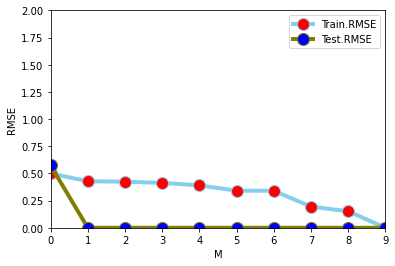

In [249]:
plt.plot( 'M', 'Train.RMSE', data=df1, marker='o', markerfacecolor='red', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'M', 'Test.RMSE', data=df1, marker='o',markerfacecolor='blue',markersize=12, color='olive', linewidth=4)
plt.legend()
plt.ylabel('RMSE')
plt.xlabel('M')
plt.ylim((0,2))
plt.xlim((0,9))
plt.show()

In [250]:
random.seed(42)
X2 = np.random.uniform(0,1,120)
print(X2)
mu, sigma = 0, 1 # mean and standard deviation
N = np.random.normal(mu, sigma, 120)
print(N)
import matplotlib.pyplot as plt
y2=np.sin(2*np.pi*X2)+N*(1/10)
print(y2)
print(X2)

[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548  0.64589411
 0.43758721 0.891773   0.96366276 0.38344152 0.79172504 0.52889492
 0.56804456 0.92559664 0.07103606 0.0871293  0.0202184  0.83261985
 0.77815675 0.87001215 0.97861834 0.79915856 0.46147936 0.78052918
 0.11827443 0.63992102 0.14335329 0.94466892 0.52184832 0.41466194
 0.26455561 0.77423369 0.45615033 0.56843395 0.0187898  0.6176355
 0.61209572 0.616934   0.94374808 0.6818203  0.3595079  0.43703195
 0.6976312  0.06022547 0.66676672 0.67063787 0.21038256 0.1289263
 0.31542835 0.36371077 0.57019677 0.43860151 0.98837384 0.10204481
 0.20887676 0.16130952 0.65310833 0.2532916  0.46631077 0.24442559
 0.15896958 0.11037514 0.65632959 0.13818295 0.19658236 0.36872517
 0.82099323 0.09710128 0.83794491 0.09609841 0.97645947 0.4686512
 0.97676109 0.60484552 0.73926358 0.03918779 0.28280696 0.12019656
 0.2961402  0.11872772 0.31798318 0.41426299 0.0641475  0.69247212
 0.56660145 0.26538949 0.52324805 0.09394051 0.5759465  0.9292962

RMSE: 0.09496775471951993
R2: 0.9814969951999325


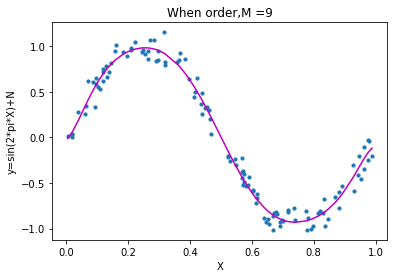

In [251]:
np.random.seed(0)
polynomial_features= PolynomialFeatures(degree=9)
x2_poly = polynomial_features.fit_transform(X2.reshape(120,1))

# transforming the data to include another axis
x2 = X2[:, np.newaxis]
y2= y2[:, np.newaxis] 

model = LinearRegression()
model.fit(x2_poly, y2)
y2_poly_pred = model.predict(x2_poly)

rmse = np.sqrt(mean_squared_error(y2,y2_poly_pred))
r2 = r2_score(y2,y2_poly_pred)
print("RMSE:",rmse)
print("R2:",r2)

plt.scatter(x2, y2, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x2,y2_poly_pred), key=sort_axis)
x2, y2_poly_pred = zip(*sorted_zip)
plt.plot(x2, y2_poly_pred, color='m')
plt.title('When order,M =9')
plt.xlabel('X')
plt.ylabel('y=sin(2*pi*X)+N')
plt.show()


In [252]:
import math
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
import operator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


In [253]:
def regularizeRidge(alpha):
    if alpha < 0: alpha = math.exp(alpha)    
    else:
        print("alpha = ",alpha)
        if alpha != 0: print("ln(alpha) = ", math.log(alpha))
    polynomial_features= PolynomialFeatures(degree=9)
    x_transformed =  polynomial_features.fit_transform(X2.reshape(120,1))
    poly_linear_model = Ridge(alpha = alpha)
    poly_linear_model.fit(x_transformed, y2)
    return poly_linear_model

def chartRidge(alpha): 
    model = regularizeRidge(alpha)
    xx = np.linspace(0, 1, 120)
    x_transformed =polynomial_features.fit_transform(xx.reshape(120,1))
    yy = model.predict(x_transformed)
    plt.plot(xx, yy,label=alpha)
    plt.scatter(X_train, y_train)
    plt.scatter(Xt, yt, c = 'r')
    plt.legend()

alpha =  0


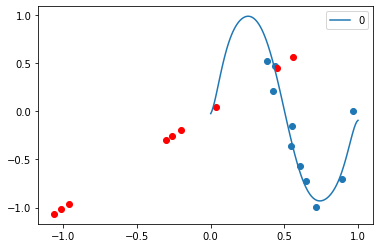

In [254]:
chartRidge(0)

alpha =  0.1
ln(alpha) =  -2.3025850929940455


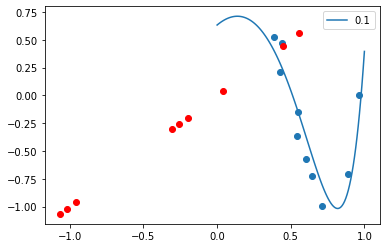

In [255]:
chartRidge(0.1)


alpha =  0.01
ln(alpha) =  -4.605170185988091


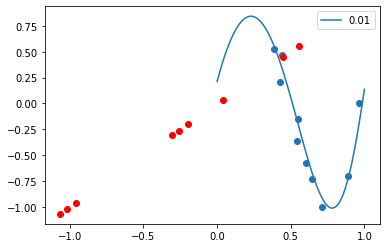

In [256]:
chartRidge(0.01)

alpha =  0.001
ln(alpha) =  -6.907755278982137


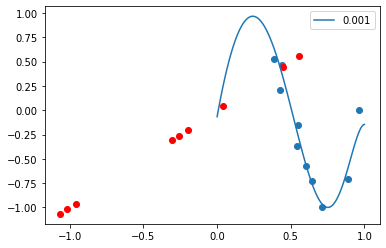

In [257]:
chartRidge(0.001)

alpha =  0.0001
ln(alpha) =  -9.210340371976182


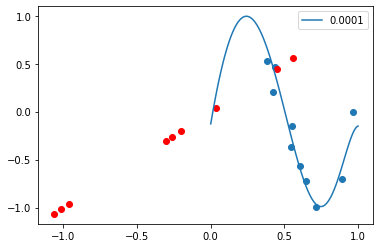

In [258]:
chartRidge(0.0001)

alpha =  10
ln(alpha) =  2.302585092994046


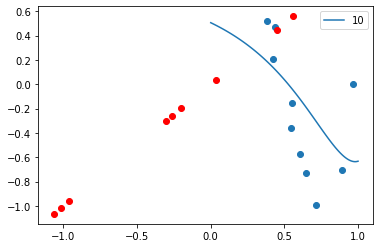

In [259]:
chartRidge(10)

alpha =  100
ln(alpha) =  4.605170185988092


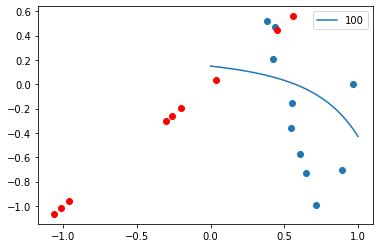

In [260]:
chartRidge(100)

alpha =  1000
ln(alpha) =  6.907755278982137


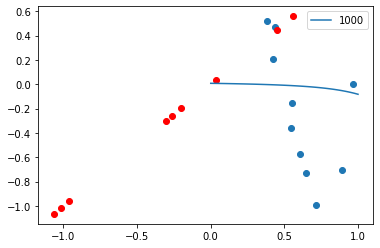

In [261]:
chartRidge(1000)

alpha =  10000
ln(alpha) =  9.210340371976184


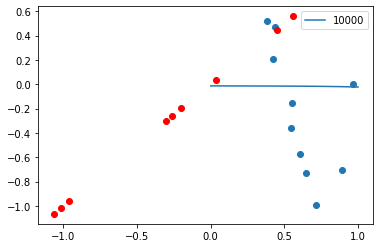

In [262]:
chartRidge(10000)

In [263]:
from sklearn.metrics import mean_squared_error 
import tensorflow as tf
def getMse(Y, yy):
    standard = tf.square(Y - yy)
    mse = tf.reduce_mean(standard)
    return mse.numpy()


train_error_ridge = np.zeros(30)
test_error_ridge = np.zeros(30)

def getErrorRidge(i:int,  model) :     # A new error function
    xx_transformed_test = polynomial_features.fit_transform(Xt.reshape(Xt.shape[0], 1))
    xx_transformed_train = polynomial_features.fit_transform(X_train.reshape(X_train.shape[0], 1))
    yy_test = model.predict(xx_transformed_test)
    yy_train = model.predict(xx_transformed_train)
    test_error_ridge[i] = getMse(yt, yy_test)
    train_error_ridge[i] = getMse(y_train, yy_train)

In [264]:
xx = list(range(-30, 0))
for i in xx:
    model = regularizeRidge(i)
    getErrorRidge(i, model)

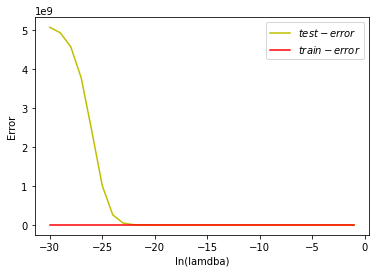

In [265]:
xx = list(range(-30, 0))
plt.plot(xx, test_error_ridge, label = "$test-error$", c = 'y')
plt.plot(xx, train_error_ridge, label = "$train-error$", c = 'r')

plt.xlabel('ln(lamdba)')

plt.ylabel('Error')
plt.legend()

In [266]:
 # Now lets see the best lambda
best_lambda = 0
for i in range(-30,0):
    if test_error_ridge[i+30] == test_error_ridge.min(): best_lambda = i
print("best ln(lambda)based on my analysis = ", best_lambda)
best_lambda_0 = math.exp(best_lambda)
print("best lambda = ", best_lambda_0)
print("In Conclusion of this analysis, the model with input ln(lamdba) = ",best_lambda,", lambda = ",best_lambda_0," will provide best test performance.")

best ln(lambda)based on my analysis =  -1
best lambda =  0.36787944117144233
In Conclusion of this analysis, the model with input ln(lamdba) =  -1 , lambda =  0.36787944117144233  will provide best test performance.
